<a href="https://colab.research.google.com/github/wonmyeong/olive-young/blob/master/log.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import os
import sys
if 'google.colab' in sys.modules:
    # 사이킷런 최신 버전을 설치합니다.
    !pip install -q --upgrade scikit-learn
    if not os.path.isdir('data'):
        # 데이터를 다운받고 압축을 풉니다.
        !wget -q -O data.tar.gz https://bit.ly/data-tar-gz
        !tar -xzf data.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 22.6 MB/s eta 0:00:00


In [ ]:
!pip install -q tweepy==3.10

In [ ]:
try:
    import konlpy
except:
    !pip install -q konlpy
    import konlpy

import pandas as pd
import numpy as np

konlpy.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 31.3 MB/s eta 0:00:00


'0.6.0'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
review_pos_df = pd.read_csv("review_pos_data_df")
review_neg_df = pd.read_csv("review_neg_data_df")

In [ ]:
review_pos_df.drop(columns=["Unnamed: 0"],inplace=True)
review_neg_df.drop(columns=["Unnamed: 0"],inplace=True)

In [ ]:
review_neg_df['SentimentPolarity'] =0

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 48 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False


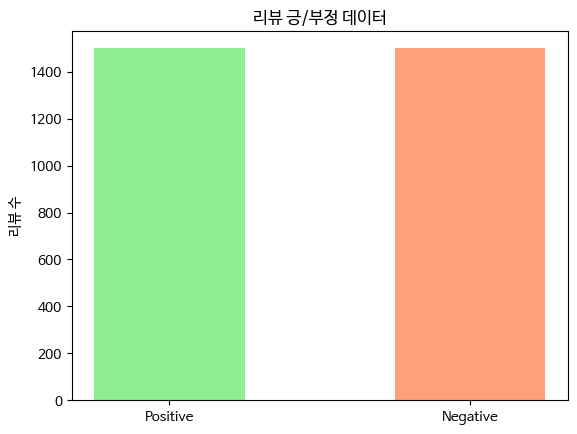

In [ ]:
# Assuming review_pos_df and review_neg_df are two dataframes
# 모델에 학습시킬 데이터 비율 1:1
lengths = [len(review_pos_df), len(review_neg_df)]
labels = ['Positive', 'Negative']
colors = ['#90EE90', '#FFA07A']

fig, ax = plt.subplots()
ax.bar(labels, lengths, color=colors, width=0.5)
ax.set_ylabel("리뷰 수")
ax.set_title("리뷰 긍/부정 데이터")

plt.subplots_adjust(wspace=1)

plt.show()

In [ ]:
concat_df = pd.concat([review_pos_df,review_neg_df],ignore_index=True)

In [ ]:
concat_df.columns=['review','label']

In [ ]:
concat_df.to_csv("concat_review_df")

In [ ]:
concat_df.review

0                   유통기한도 넉넉하고
1           구성도 많아서 선물 하기 좋네요.
2                       구성도알차고
3                    촉촉하고너무좋아용
4          대용량으로 넉넉하게 사용할 수 있고
                 ...          
2995                  구성도 아쉽지만
2996            오랫동안 촉촉하지 않아요.
2997                 촉촉하지 않아요.
2998    목 주름 개선 효과도 없는 것 같습니다.
2999                      비싸도 
Name: review, Length: 3000, dtype: object

In [ ]:
from konlpy.tag import Okt
okt = Okt()
def clean_text(text):
      tokens = okt.pos(text)
      # 조사, 구두점, 알파벳을 제외
      tokens = [(word, pos) for word, pos in tokens if pos not in ['Josa', 'Punctuation', 'Alpha']]
      # Extract only the words from the first element of each tuple
      words = [word for word, _ in tokens]

      # Join the words together to form a sentence
      cleaned_text = ' '.join(words)  # 공백 없이 한글 단어들을 연결합니다.

      return cleaned_text

In [ ]:
concat_df['review'] = concat_df['review'].apply(lambda x: clean_text(x))

text_test = concat_df['review'].values
y_test = concat_df['label'].values


In [ ]:
text_test

array(['유통 기한 넉넉하고', '구성 많아서 선물 하기 좋네요', '구성 알차고', ..., '촉촉하지 않아요',
       '목 주름 개선 효과 없는 것 같습니다', '비싸도'], dtype=object)

In [ ]:
from konlpy.tag import Okt

class PicklableOkt(Okt):
    def __init__(self, *args):
        self.args = args
        Okt.__init__(self, *args)

    def __getstate__(self):
        return {'args': self.args}

    def __setstate__(self, state):
        self.__init__(*state['args'])



In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import make_pipeline
# from sklearn.model_selection import GridSearchCV #최적의 파라미터 값을 찾는 라이브러리

# # 직렬화 가능한 PickableOkt 사용하여 파이프라인 생성
# param_grid = {
#     'tfidfvectorizer__min_df': [3],
#     'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
#     'logisticregression__C': [0.1, 1, 10]
# }

# pipe = make_pipeline(TfidfVectorizer(tokenizer=PicklableOkt().morphs), LogisticRegression())
# grid = GridSearchCV(pipe, param_grid, n_jobs=-1)
# grid.fit(text_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(tokenizer=<bound method Okt.morphs of <__main__.PicklableOkt object at 0x7be2859a1f00>>)),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.1, 1, 10],
                         'tfidfvectorizer__min_df': [3],
                         'tfidfvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (1, 3)]})

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV #최적의 파라미터 값을 찾는 라이브러리

# 직렬화 가능한 PickableOkt 사용하여 파이프라인 생성
param_grid = {
    'tfidfvectorizer__min_df': [3],
    'tfidfvectorizer__ngram_range': [(1, 3)],
    'logisticregression__C': [10]
}

pipe = make_pipeline(TfidfVectorizer(tokenizer=PicklableOkt().morphs), LogisticRegression())
grid = GridSearchCV(pipe, param_grid, n_jobs=-1)
grid.fit(text_test, y_test)

In [ ]:
print("최적의 교차 검증 점수 : {:.2f}".format(grid.best_score_))
print("최적의 매개변수 : \n",grid.best_params_)

최적의 교차 검증 점수 : 0.84
최적의 매개변수 : 
 {'logisticregression__C': 10, 'tfidfvectorizer__min_df': 3, 'tfidfvectorizer__ngram_range': (1, 3)}


In [ ]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.3 MB/s eta 0:00:00


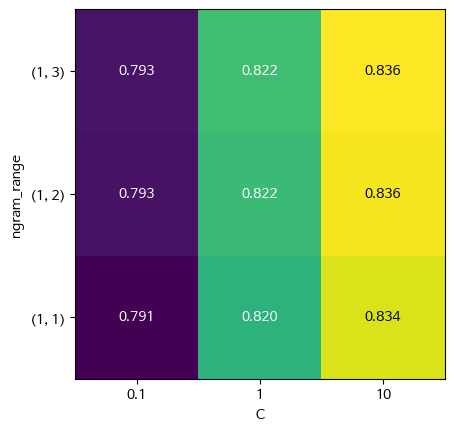

In [ ]:
import mglearn
scores = grid.cv_results_["mean_test_score"].reshape(-1,3).T
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C",ylabel="ngram_range", cmap="viridis",fmt="%.3f",
    xticklabels = param_grid['logisticregression__C'],
    yticklabels = param_grid['tfidfvectorizer__ngram_range']
)

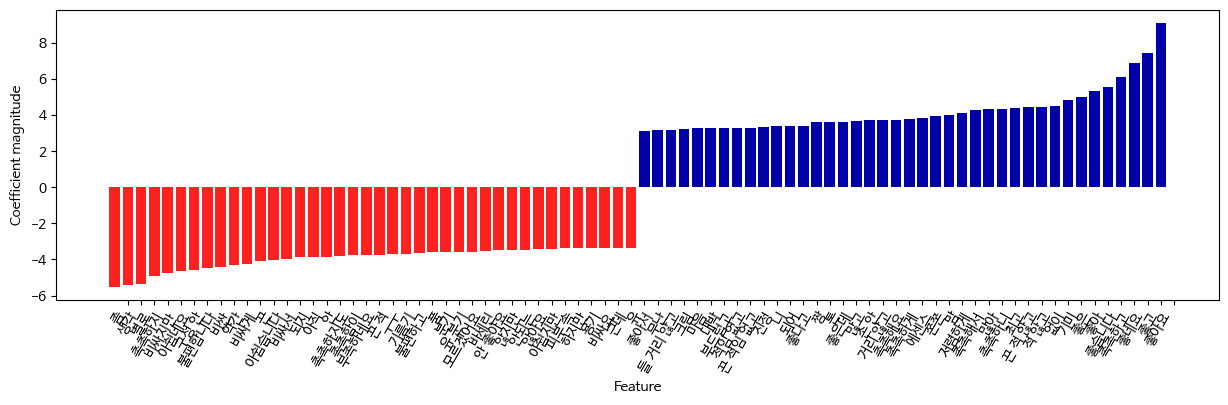

In [ ]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names_out())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef[0],feature_names,n_top_features=40)

In [ ]:
final_olive_review = pd.read_csv("final_olive_review_data_df")

NameError: name 'pd' is not defined

In [ ]:
final_olive_review.drop(columns={"Unnamed: 0"},inplace=True)

In [ ]:
final_olive_review.head()

,userId,rating,reviews
0,와바밤,1,사실 마스크 팩 한 달동 안 사용 것 아니라 한 달 리뷰 하기 얘 매하 긴한데 어쩃...
1,와바밤,1,배송비 가격 맞출 때 유용하게 매번 구매 있습니다 자극 없이 순해여
2,보부상출신,1,나이 먹으니까 피부 고민 점차 주름 미백 쪽 빠지는데데 일리 피부 결 톤 케어 하기...
3,파이지니,1,🌼 1일 1 팩 하기 좋은 가성 비 마스크 팩 🌼 메디 힐 마스크 팩 너무 유명하죠...
4,보부상출신,1,요즘 제 피부 상태 탄력 지금 저 세상 가있는데 복구 위해 콜라겐 마스크 팩 이용 ...


In [ ]:
final_olive_review[final_olive_review['reviews'].isna() ==True]

,userId,rating,reviews
71,수지여사57,1,NaN


In [ ]:
missing_values = final_olive_review['reviews'].isna().sum()

# If there are missing values, drop the corresponding rows
if missing_values > 0:
    final_olive_review.dropna(subset=['reviews'], inplace=True)

In [ ]:
final_olive_review[final_olive_review['reviews'].isna() ==True]

,userId,rating,reviews


In [ ]:
x_test = final_olive_review['reviews']
y_test = final_olive_review['rating']

In [ ]:
# Create an empty list to store predicted classes
predicted_classes = []

# Iterate over each review in the DataFrame column
for review in final_olive_review['reviews']:
    # Make prediction using the best estimator found by GridSearchCV
    predicted_class = grid.predict([review])

    # Append the predicted class to the list
    predicted_classes.append(predicted_class[0])  # Access the predicted class (it's a numpy array) and append

# Add the predicted classes as a new column named 'prediction' to the DataFrame
final_olive_review['prediction'] = predicted_classes



            userId  rating                                            reviews  \
0              와바밤       1  사실 마스크 팩 한 달동 안 사용 것 아니라 한 달 리뷰 하기 얘 매하 긴한데 어쩃...   
1              와바밤       1              배송비 가격 맞출 때 유용하게 매번 구매 있습니다 자극 없이 순해여   
2            보부상출신       1  나이 먹으니까 피부 고민 점차 주름 미백 쪽 빠지는데데 일리 피부 결 톤 케어 하기...   
3             파이지니       1  🌼 1일 1 팩 하기 좋은 가성 비 마스크 팩 🌼 메디 힐 마스크 팩 너무 유명하죠...   
4            보부상출신       1  요즘 제 피부 상태 탄력 지금 저 세상 가있는데 복구 위해 콜라겐 마스크 팩 이용 ...   
..             ...     ...                                                ...   
595       nam****        0  에센스 피부 오히랴 건조하게 하는 느낌 이였어용 ㅠㅠ 일시 적 보습 력 있고 그 이...   
596     dltnw****        0  항상 즐겨 쓰는 팩 입니다아 얼굴 크기 적당하게 잘 맞고 많이 예민해서 아무 거나 ...   
597       puk****        0  문 앞 놔 달라 했는데 경비실 놓고가서 없어진줄 알 당황 했어 욪 택배 기사 님 이...   
598   sojung2****        0  10 개 이상 구매 하면 박스 오는줄 알았는데 낱개 와서 아쉬워요 팩 원래 이렇게 ...   
599       pga****        0                   딱히 진정 효과 있는지 모르겠고 보습 효과 잘 모르겠습니다   

     prediction  
0        

In [ ]:
final_olive_review.head()

,userId,rating,reviews,prediction
0,와바밤,1,사실 마스크 팩 한 달동 안 사용 것 아니라 한 달 리뷰 하기 얘 매하 긴한데 어쩃...,0
1,와바밤,1,배송비 가격 맞출 때 유용하게 매번 구매 있습니다 자극 없이 순해여,1
2,보부상출신,1,나이 먹으니까 피부 고민 점차 주름 미백 쪽 빠지는데데 일리 피부 결 톤 케어 하기...,1
3,파이지니,1,🌼 1일 1 팩 하기 좋은 가성 비 마스크 팩 🌼 메디 힐 마스크 팩 너무 유명하죠...,1
4,보부상출신,1,요즘 제 피부 상태 탄력 지금 저 세상 가있는데 복구 위해 콜라겐 마스크 팩 이용 ...,1


(1,)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,final_olive_review['prediction'])

In [ ]:
print("모델 분류 정확도 : {:.2f}".format(accuracy))

모델 분류 정확도 : 0.69


In [ ]:
olive_med_df = pd.read_csv("olive_young_med_df")

In [ ]:
import re
olive_med_df['reviews'] = olive_med_df.reviews.apply(lambda x: re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z0-9\s]', '', x))

In [ ]:
labeling_med_df = pd.DataFrame()

In [ ]:
# Create an empty list to store predicted classes
predicted_classes = []

# Iterate over each review in the DataFrame column
for review in olive_med_df['reviews']:
    # Make prediction using the best estimator found by GridSearchCV
    predicted_class = grid.predict([review])

    # Append the predicted class to the list
    predicted_classes.append(predicted_class[0])  # Access the predicted class (it's a numpy array) and append

# Add the predicted classes as a new column named 'prediction' to the DataFrame
olive_med_df['prediction'] = predicted_classes

In [ ]:
olive_med_df.head()

,Unnamed: 0,userId,rating,reviews,prediction
0,0,플로우플로우,3,메디힐 마스크 팩 티트리콜라겐시카등등 종류별대로 사용 해 보다가피부톤이 얼룩덜룩하고...,0
1,1,엉성해,3,데일리로 그냥 쓰기 좋은 제품데일리로 그냥 쓰기 좋은 제품 n,1
2,2,엉성해,3,머 저렴이로 매일 붙히기 부담없는 정도머 저렴이로 매일 붙히기 부담없는 정도머 ...,0
3,3,예원071,3,마스크팩했을 때 확실히 얼굴이 환해지기는 하는데 원래 피부가 수분 먹으면 환해지는 ...,0
4,4,예원071,3,트러블이 들어간다는 건 잘 모르겠는데 붉은 기는 잘 없애주는 듯 근데 내 피부 기준...,0


In [ ]:
# 올영 데이터 프레임 만들기
# olive_pos_df = pd.read_csv("olive_young_pos_df")
# olive_neg_df = pd.read_csv("olive_young_neg_df")

# olive_pos_df.rating = 1
# olive_neg_df.rating = 0


# import re
# olive_pos_df['reviews'] = olive_pos_df['reviews'].apply(lambda x: re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z0-9\s]', '', x))
# olive_neg_df['reviews'] = olive_neg_df['reviews'].apply(lambda x: re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z0-9\s]', '', x))

# olive_pos_df.drop(columns=['Unnamed: 0'],inplace=True)
# olive_neg_df.drop(columns=['Unnamed: 0'],inplace=True)

# concat_olive_df = pd.concat([olive_pos_df,olive_neg_df],ignore_index=True)

# olive_pos_df.drop(columns=['Unnamed: 0'],inplace=True)
# olive_neg_df.drop(columns=['Unnamed: 0'],inplace=True)

# concat_olive_df = pd.concat([olive_pos_df,olive_neg_df],ignore_index=True)

In [ ]:
!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum




Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 48 not upgraded.
